In [1]:
"""Implement a python program to classify the plants dataset using the Stochastic Gradient Descent classifier.
"""

'Implement a python program to classify the plants dataset using the Stochastic Gradient Descent classifier.\n'

## Load the dataset and partition the dataset in the train and test sets

In [2]:
#Libraries that were imported 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelEncoder, StandardScaler

In [3]:
# Changing the current working directory 
os.chdir("/Users/bensonkachappilly/Python directory/Data Science studio/Assignments /Assignment 2 ")

In [4]:
def load_data(dataset_path):
    """Function load_data loads in the dataset from the directory where the Plants_Dataset.csv is stored.

         Arguments:
        dataset_path: path to the dataset

         Returns:
        pandas dataframe of the dataset

    """
    return pd.read_csv(dataset_path)

In [5]:
dataset_path = ("Plants_Dataset.csv")

In [6]:
print(load_data(dataset_path))

   Site  height  mouth_diam  tube_diam  keel_diam  wingspread  hoodarea  \
0   TJH     654        38.4       16.6        6.4          55     63.77   
1   TJH     413        22.2       17.2        5.9          60     21.10   
2   TJH     610        31.2       19.9        6.7          78     28.47   
3   TJH     546        34.4       20.8        6.3          95     48.82   
4   TJH     665        30.5       20.4        6.6          30     29.48   
..  ...     ...         ...        ...        ...         ...       ...   
75   HD     503        22.8       26.8        9.8          72     41.58   
76   HD     540        18.1       22.6        9.5          90     33.62   
77   HD     648        22.7       21.4        8.8          50     31.01   
78   HD     595        31.5       22.5        7.8          85     51.03   
79   HD     528        23.4       17.4        4.9          75     33.48   

    wingarea  tubearea  tubemass_g  wingmass_g  Ca_ppm    P_ppm     K_ppm  \
0      33.65     87.15

In [7]:
plants = load_data(dataset_path)

In [8]:
plants.head()

,Site,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_ppm,H_ppm,N_ppm
0,TJH,654,38.4,16.6,6.4,55,63.77,33.65,87.15,3.54,0.29,717.90,997.12,10699.50,1983.40,49.43,5.50,0.93
1,TJH,413,22.2,17.2,5.9,60,21.10,7.36,44.78,1.48,0.06,392.74,876.99,9576.49,1540.73,50.24,5.63,0.94
2,TJH,610,31.2,19.9,6.7,78,28.47,15.75,56.64,2.20,0.16,402.45,1287.62,11738.73,1514.21,50.77,5.58,1.08
3,TJH,546,34.4,20.8,6.3,95,48.82,30.47,76.31,2.95,0.24,497.16,662.55,11173.37,1399.24,50.27,5.67,0.88
4,TJH,665,30.5,20.4,6.6,30,29.48,11.33,100.22,3.36,0.08,504.48,1115.53,7017.39,1964.15,50.20,5.56,0.98


In [9]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Site        80 non-null     object 
 1   height      80 non-null     int64  
 2   mouth_diam  80 non-null     float64
 3   tube_diam   80 non-null     float64
 4   keel_diam   80 non-null     float64
 5   wingspread  80 non-null     int64  
 6   hoodarea    80 non-null     float64
 7   wingarea    80 non-null     float64
 8   tubearea    80 non-null     float64
 9   tubemass_g  80 non-null     float64
 10  wingmass_g  80 non-null     float64
 11  Ca_ppm      80 non-null     float64
 12  P_ppm       80 non-null     float64
 13  K_ppm       80 non-null     float64
 14  Mg_ppm      80 non-null     float64
 15  C_ppm       80 non-null     float64
 16  H_ppm       80 non-null     float64
 17  N_ppm       80 non-null     float64
dtypes: float64(15), int64(2), object(1)
memory usage: 11.4+ KB


In [10]:
plants.describe()

,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_ppm,H_ppm,N_ppm
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,605.687500,30.347500,19.78875,6.385000,87.437500,45.047000,21.390000,84.305375,2.801250,0.144813,571.835625,1101.374250,11186.430500,1659.193375,48.921375,5.779250,1.048500
std,94.766414,5.938887,3.03907,2.121684,31.180099,12.822613,10.179287,22.163817,1.041462,0.088930,171.977674,297.301156,2726.031409,277.869269,3.480575,0.277716,0.205999
min,322.000000,13.600000,14.30000,1.600000,22.000000,13.810000,2.030000,29.570000,0.680000,0.020000,244.550000,662.550000,3599.580000,1068.960000,19.010000,5.170000,0.780000
25%,538.500000,26.225000,17.57500,5.075000,70.000000,34.725000,14.177500,66.637500,1.917500,0.070000,445.880000,873.557500,9409.420000,1484.490000,48.687500,5.617500,0.927500
50%,622.000000,31.300000,19.75000,6.100000,85.000000,44.740000,19.615000,88.660000,2.905000,0.130000,524.895000,1078.145000,11150.630000,1608.710000,49.190000,5.790000,0.985000
75%,665.000000,34.400000,20.80000,7.150000,108.000000,55.120000,26.570000,101.437500,3.480000,0.210000,675.710000,1247.345000,13347.385000,1779.355000,49.752500,5.942500,1.112500
max,845.000000,42.100000,29.60000,14.800000,199.000000,77.070000,58.180000,130.040000,5.890000,0.370000,1035.740000,2192.200000,17811.850000,2618.650000,52.110000,6.850000,1.750000


In [11]:
def check_NaN(dataframe):
    """Function check_NaN is used to identify and null values. Return will show each column and their null values

        Arguments:
            dataframe: pandas dataframe

        Returns:
            Total NaN: Total number of NaN values in the dataframe
            NaN by columns: NaN values in each column of the dataframe

    """
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by columns:\n",dataframe.isnull().sum())
    return 

In [12]:
check_NaN(plants)

Total NaN: 0
NaN by columns:
 Site          0
height        0
mouth_diam    0
tube_diam     0
keel_diam     0
wingspread    0
hoodarea      0
wingarea      0
tubearea      0
tubemass_g    0
wingmass_g    0
Ca_ppm        0
P_ppm         0
K_ppm         0
Mg_ppm        0
C_ppm         0
H_ppm         0
N_ppm         0
dtype: int64


In [13]:
#  X variable will drop the dependent variable "Site", while y variable will only contain dependent variable "Site" 
X = plants.drop(columns =["Site"])
y = plants["Site"]

In [14]:
# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print(" X train/test", X_train.shape, X_test.shape)
print("y train/test", y_train.shape, y_test.shape)

 X train/test (64, 17) (16, 17)
y train/test (64,) (16,)


In [15]:
# We need to standardise the features as the Stochastic Gradient Descent classifier and the Support Vector Machine are sensitive to the range of the features which affect how well they can be used for classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print(X_train)
print(X_train_scaled)

    height  mouth_diam  tube_diam  keel_diam  wingspread  hoodarea  wingarea  \
73     475        17.4       26.3       11.6         105     24.97     15.15   
61     685        38.8       24.8        8.7          80     60.27     19.53   
55     712        31.7       20.6        3.6          85     68.81     31.77   
40     560        42.1       14.6        3.5          75     44.66     30.00   
9      709        39.4       19.4        5.9          65     61.45     15.20   
..     ...         ...        ...        ...         ...       ...       ...   
20     662        32.9       18.5        6.5         110     51.29     18.98   
60     625        31.2       20.5        4.8         120     50.19     27.65   
71     485        13.6       19.5        7.4          75     28.55     11.67   
14     606        36.3       19.8        5.9          70     58.30     14.47   
51     632        37.6       20.3        6.6          74     54.82     19.71   

    tubearea  tubemass_g  wingmass_g  C

## Select the 2 most higher-performing features based upon cross-validation carried out on the training dataset

In [17]:
# Selecting features using Cross-Validation 
n_features = X_train.shape[1]
best_clf = None
best_f1 = 0
best_pair = (0, 1) 

for i in range(n_features):
    for j in range(i + 1, n_features):
        X_train_pair = X_train_scaled[:, [i, j]]
    
        # cross validation was selected at 10, due to the relatively small dataset, this can give a more robust estimate of model performance
        # alpha determines the strength of regularization. A value of 0.001 was chosen due to an error message that some class labels were not predicting samples as it was 0. This occurred when it was >0.001. 
        # max_iter determines the maximum number of iterations over the training data. A value of 300 was chosen as the same error of class labels not predicting samples was 0. 
        #
        clf = SGDClassifier(alpha = 0.001, max_iter = 300, random_state = 42, class_weight = 'balanced')
        
        scores = cross_val_score(clf, X_train_pair, y_train, cv=10, scoring = "f1_macro")
        
        mean_f1 = np.mean(scores)
        
        if mean_f1 > best_f1:
            best_f1 = mean_f1
            best_pair = (i, j)
            best_clf = clf

# Training the best features         
X_train_best = X_train_scaled[:, list(best_pair)]
best_clf.fit(X_train_best, y_train)

y_train_predicted = best_clf.predict(X_train_best)

# Transforming the test set for the selected features 
X_test_best = X_test_scaled[:, list(best_pair)]
y_test_predicted = best_clf.predict(X_test_best)

# Evaluating the model 
conf_matrix = confusion_matrix(y_test, y_test_predicted)         

In [18]:
# The 2 highest performing features based on the cross-validation carried out on the training dataset
best_feature_names = X.columns[list(best_pair)]
print("Best feature names:", best_feature_names)

Best feature names: Index(['keel_diam', 'H_ppm'], dtype='object')


## Construct a confusion matrix based on the classifiers performance on the test set and use this to calculate the recall, precision and F1 scores for each class

In [19]:
# Recall, Precision and F1 score on training data
train_recall = recall_score(y_train, y_train_predicted, average=None)
train_precision = precision_score(y_train, y_train_predicted, average=None)
train_f1 = f1_score(y_train, y_train_predicted, average=None)

print("Training Recall:", train_recall)
print("Training Precision:", train_precision)
print("Training F1 Score:", train_f1)

Training Recall: [0.77777778 0.7        0.41176471 0.47368421]
Training Precision: [0.42424242 0.7        0.7        0.81818182]
Training F1 Score: [0.54901961 0.7        0.51851852 0.6       ]


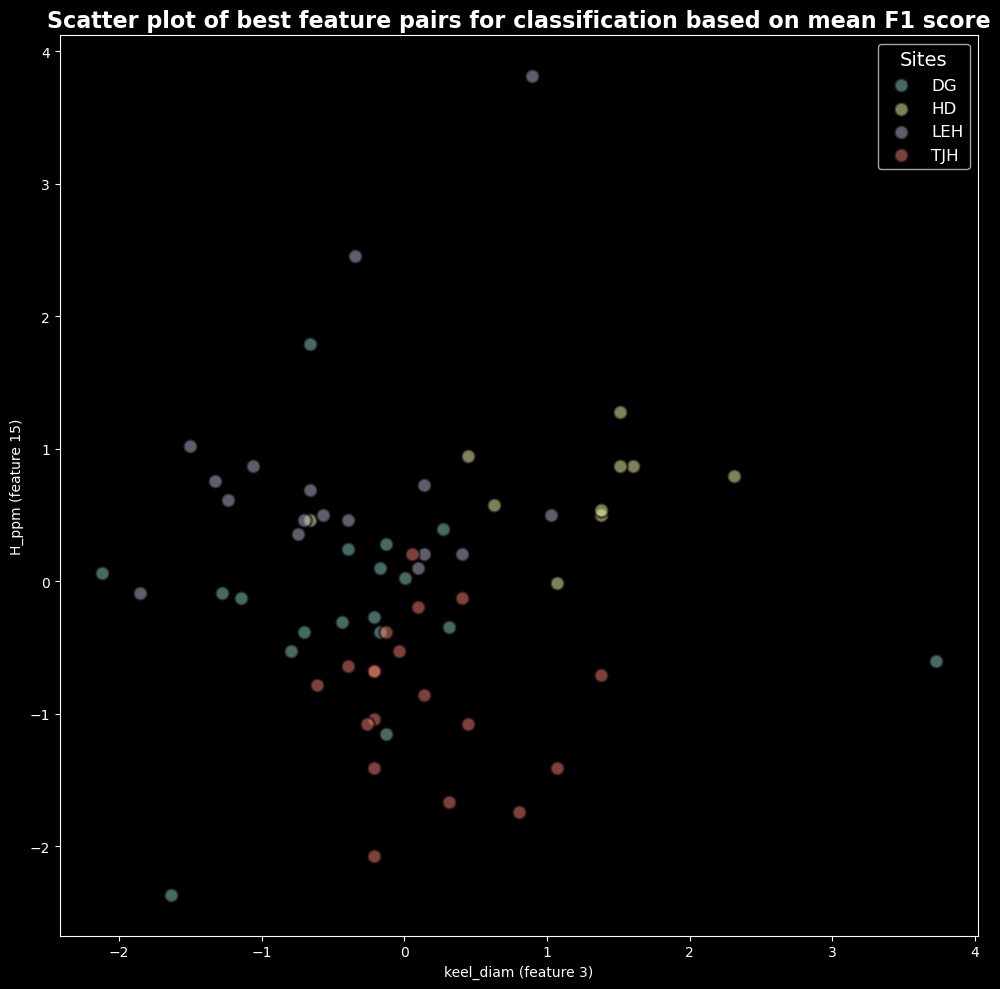

In [35]:
# Creating a scatter plot and decision boundary, label needs to numerical as y_train contains categorical data 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

best_clf.fit(X_train_best, y_train_encoded)

fig, ax1 = plt.subplots(figsize = (10,10))

#Each class will need to be plotted separately to add labels for the legend 
site_names = label_encoder.inverse_transform([ 0, 1, 2, 3])
for i, label in enumerate(site_names):
    ax1.scatter(
        X_train_best[y_train_encoded == i, 0], # x values for each class (best feature 1)
        X_train_best[y_train_encoded == i, 1], # y values for each class (best feature 2)
        label = label, # original class label 
        alpha = 0.5,
        s = 100,
        marker = 'o',
        linewidth = 2,
        edgecolor = 'k'
    )

ax1.set_title("Scatter plot of best feature pairs for classification based on mean F1 score", fontsize = 16, fontweight = 'bold')
ax1.set_xlabel(f"{X.columns[best_pair[0]]} (feature {best_pair[0]})") 
ax1.set_ylabel(f"{X.columns[best_pair[1]]} (feature {best_pair[1]})")

ax1.legend(title = "Sites", title_fontsize = 14, fontsize = 12, loc = 'upper right')

plt.tight_layout()
fig.savefig("results/scatter_plot.png", dpi = 150, bbox_inches="tight")

Test: [0.85714286 1.         0.5        0.83333333]
Test: [0.75       1.         1.         0.83333333]
Test: [0.8        1.         0.66666667 0.83333333]


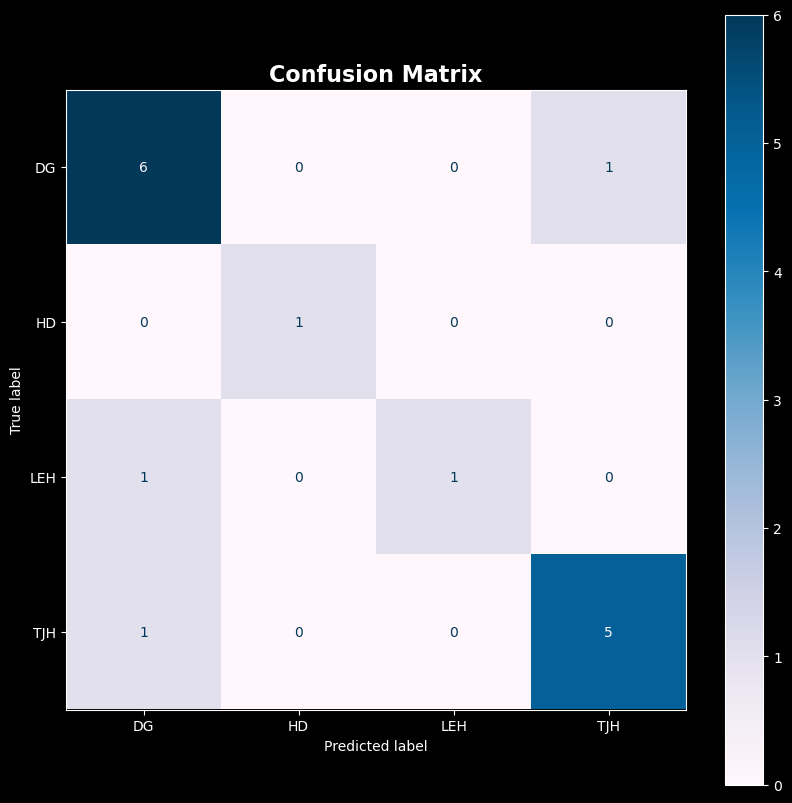

In [36]:
# Creating confusion matrix 
fig, ax2 = plt.subplots(figsize = (10,10))

#Each class will need to be plotted separately to add labels for the legend 
disp = ConfusionMatrixDisplay.from_estimator(
    best_clf, 
    X_test_best, 
    y_test_encoded,
    display_labels = label_encoder.classes_,
    cmap = plt.cm.PuBu,
    ax = ax2
)
ax2.set_title('Confusion Matrix', fontsize = 16, fontweight = 'bold')

print("Test:", recall_score(y_test, y_test_predicted, average = None))
print("Test:", precision_score(y_test, y_test_predicted, average = None))
print("Test:", f1_score(y_test, y_test_predicted, average = None))

fig.savefig("results/confusion_matrix.png", dpi=150, bbox_inches="tight")


## Construct a ROC curve for each class and calculate the respective AUC values

In [22]:
# Create ROC curve and AUC values
# Decision scores 
y_scores = best_clf.decision_function(X_test_best)

# The roc_curve and auc function is designed to handle binary classification, not multiclass classification. Therefore, we need to use the one vs rest approach, where we perform the ROC curve and AUC for each class separately 
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Create empty dictionary 
fpr = dict()
tpr = dict()
roc_auc = dict()

# Design the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(n_classes):
    print(f"AUC for class {i}: {roc_auc[i]:.2f}")



AUC for class 0: 0.63
AUC for class 1: 1.00
AUC for class 2: 1.00
AUC for class 3: 0.92


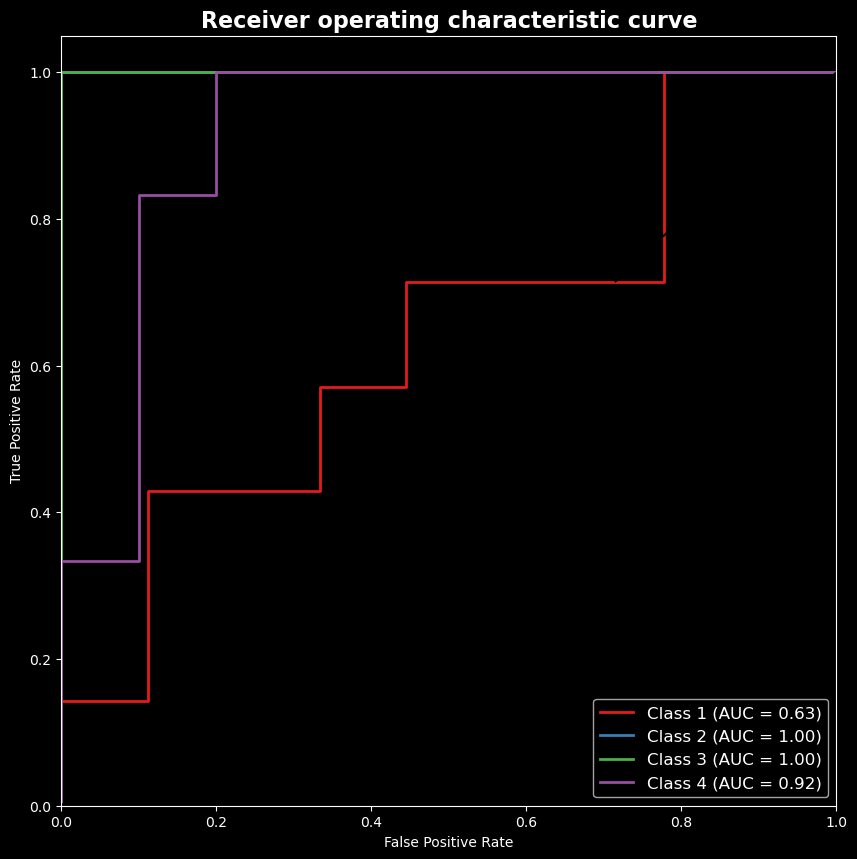

In [37]:
# Create the number of colours needed 
fig, ax3 = plt.subplots(figsize = (10,10))
colours = plt.get_cmap('Set1')

# Adjusting the label i + 1 starts the class from 1 instead of 0 
for i in range(n_classes):
    ax3.plot(fpr[i], tpr[i], color=colours(i), lw = 2, label = f"Class {i + 1} (AUC = {roc_auc[i]:0.2f})")

ax3.plot([0, 1], [0, 1], "k--") #Plotting the diagonal line for random chance 
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel("False Positive Rate")
ax3.set_ylabel("True Positive Rate")
ax3.set_title("Receiver operating characteristic curve", fontweight = 'bold', fontsize = 16)
ax3.legend(loc = 'lower right', fontsize = 12)

fig.savefig("results/ROC_curve.png", dpi = 150, bbox_inches = "tight")

## Construct a suitable visualisation that demonstrates the decision boundaries learned by the classifier on the features selected through the cross validation process

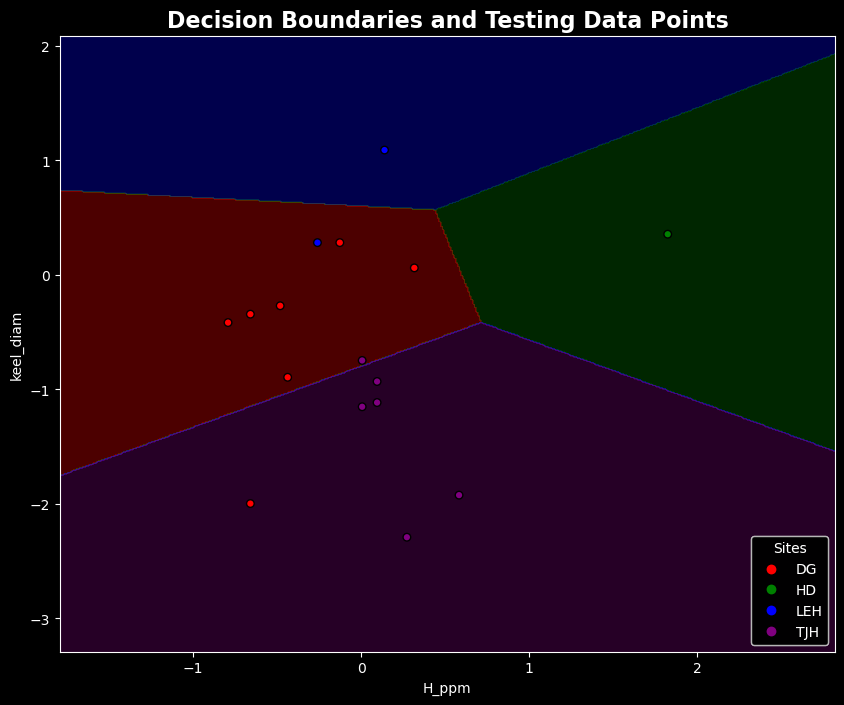

In [38]:
# Need to create a mesh grid to plot in
h = 0.01 # step size in the mesh grid

def plot_decision_boundaries(X, y, clf, ax, class_labels):
    """Function plot_decision_boundaries creates the mesh grid to identify how the classifier learns, decision boundaries

        Arguments:
            X: features
            y: target variable
            clf: classifier
            ax: axis
            class_labels: class labels

        Returns:
            Decision boundaries and testing data points

    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap = ListedColormap(("red", "green", "blue", "purple")))
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=ListedColormap(('red', 'green', 'blue', 'purple')), edgecolor='k')
    
    # Manually create a legend mapping
    handles, _ = scatter.legend_elements()
    unique_classes = np.unique(y)
    labels_dict = {i: class_labels[i] for i in unique_classes}
    labels = [labels_dict[unique_class] for unique_class in unique_classes]
    legend1 = ax.legend(handles=handles, labels=labels, loc="lower right", title="Sites")
    ax.add_artist(legend1)
    
# Plot decision boundaries with site names as labels
fig, ax4 = plt.subplots(figsize=(10, 8))
plot_decision_boundaries(X_test_best, y_test_encoded, best_clf, ax4, site_names)
ax4.set_xlabel('H_ppm')
ax4.set_ylabel('keel_diam')
ax4.set_title('Decision Boundaries and Testing Data Points', fontweight='bold', fontsize=16)
fig.savefig("results/decision_boundaries.png", dpi=150, bbox_inches="tight")